In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classifying by dividing the space

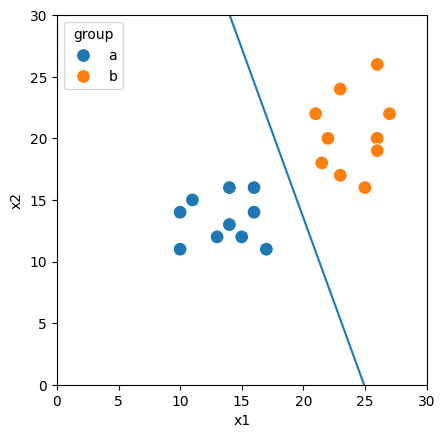

In [2]:
### Add an appropriate line to this plot
x1 = [10, 10, 11, 13, 15, 14, 16, 17, 16, 14,  21.5, 22, 23, 23, 21, 26, 26, 25, 27, 26 ]
x2 = [11, 14, 15, 12, 12, 13, 14, 11, 16, 16,  18, 20, 17, 24, 22, 20, 19, 16, 22, 26 ]
cluster =['a','a','a', 'a', 'a','a','a', 'a','a','a',
          'b', 'b', 'b', 'b', 'b',  'b','b','b','b','b']
d ={'x1':x1, 'x2':x2, 'group':cluster}
df = pd.DataFrame(data=d)
sns.scatterplot(data=df,x='x1',y='x2', hue='group', s=100)

#plt.plot( ADD YOUR LINE HERE)
x = np.linspace(0,30, 100)
# y = 43 - 1.4 * x
# y = -(3/2) * x + 18 + 9.5 * 3
y = (-5.5 / 2) * x + 17 + 18.75 * (5.5 / 2)

plt.plot(x, y)

# Max blue = (16, 16)
# margin min orange = (22, 20)

plt.xlim(0,30)
plt.ylim(0,30)
plt.gca().set_aspect('equal')

## Mouse Study

https://www.kaggle.com/datasets/soumallyabishayee/analysis-of-infection-by-mouse

In [3]:
df = pd.read_csv("data/mouse_viral_study.csv")

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

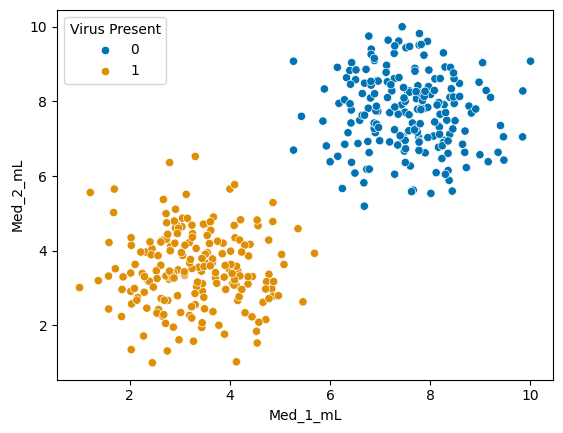

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='colorblind')

Rather than manually adding a line, we want to have sklearn help us find the hyperplane that fits best, depending on our data set.

* For 2 input dimensions, this will be a line
* For 3 input dimensions, a plane makes sense
* For 4 or more input dimensions, we call it a hyperplane

For this first example, we will try it without the test-train split, just to get a sense of what we are doing.

In [6]:
from sklearn.svm import SVC
X = df.drop('Virus Present', axis = 1)
y = df['Virus Present']

model = SVC(kernel='linear', C = 10)
model.fit(X,y)

SVC(C=10, kernel='linear')

C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


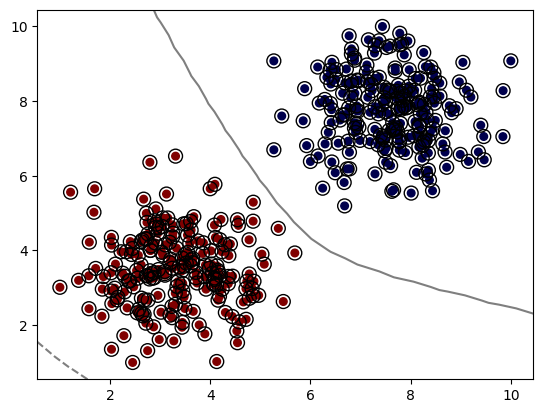

In [7]:
from svm_margin_plot import plot_svm_boundary

model = SVC(kernel='sigmoid', C = 1, gamma = 0.5)
model.fit(X,y)
plot_svm_boundary(model, X, y)

# model = SVC(kernel='rbf', C = 1, gamma = 'scale')
# model.fit(X,y)
# plot_svm_boundary(model, X, y)

# model = SVC(kernel='linear', C = 1000)
# model.fit(X,y)
# plot_svm_boundary(model, X, y)


In [8]:
df = pd.read_csv("data/ExampleSVC.csv")
df

,X,Y,Target
0,1,22,red
1,2,17,red
2,3,25,red
3,4,5,red
4,5,2,red
...,...,...,...
88,21,34,blue
89,20,27,blue
90,13,44,blue
91,14,50,blue


Accuracy Score:  0.895
              precision    recall  f1-score   support

        blue       0.75      1.00      0.86         6
         red       1.00      0.85      0.92        13

    accuracy                           0.89        19
   macro avg       0.88      0.92      0.89        19
weighted avg       0.92      0.89      0.90        19


C:\Users\coleo\PycharmProjects\ds401\ds401\svm_margin_plot.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')
C:\Users\coleo\PycharmProjects\ds401\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


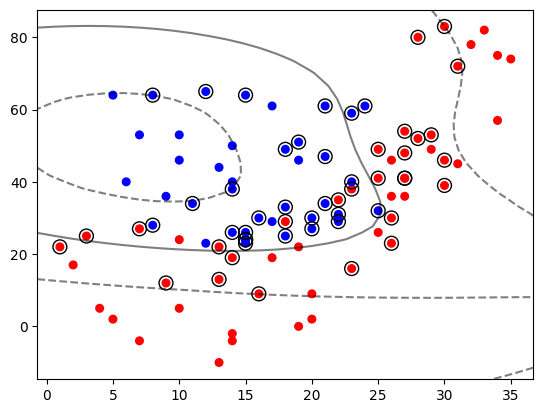

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis = 1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model = SVC(kernel='rbf', C = 0.5, gamma = 'scale')
# model = SVC(kernel='sigmoid', C = 5, gamma = 'scale')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

plot_svm_boundary(model, X, y)

In [2]:
from tqdm import tqdm
import random

CVALUES = np.linspace(0.5, 10, 100)
GVALUES = np.linspace(0.5, 1, 100)

cArr = []
gArr = []
aArr = []
accuracy_scores = pd.DataFrame()

for c in tqdm(CVALUES):
    for g in GVALUES:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random.randint(1, 100))

        model = SVC(kernel='rbf', C = c, gamma = g)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)

        cArr.append(c)
        gArr.append(g)
        aArr.append(accuracy_score(y_test, y_pred))

df = pd.DataFrame({'c': cArr, 'g': gArr, 'accuracy': aArr})

sns.scatterplot(data = df, x = 'c', y = 'g', hue = "accuracy", alpha = 0.3)


  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'train_test_split' is not defined

<Axes: xlabel='c', ylabel='g'>

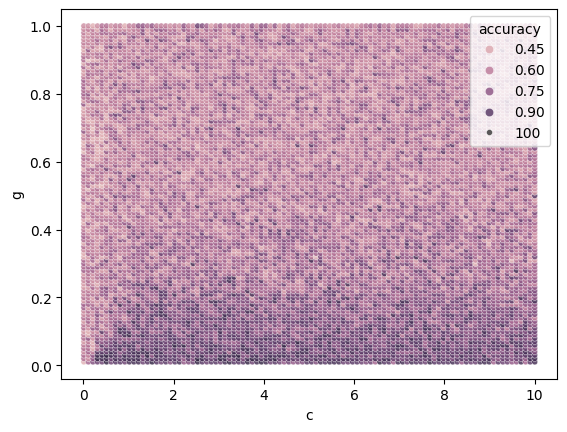

In [11]:
sns.scatterplot(data = df, x = 'c', y = 'g', hue = "accuracy", alpha = 0.8, size = 100)

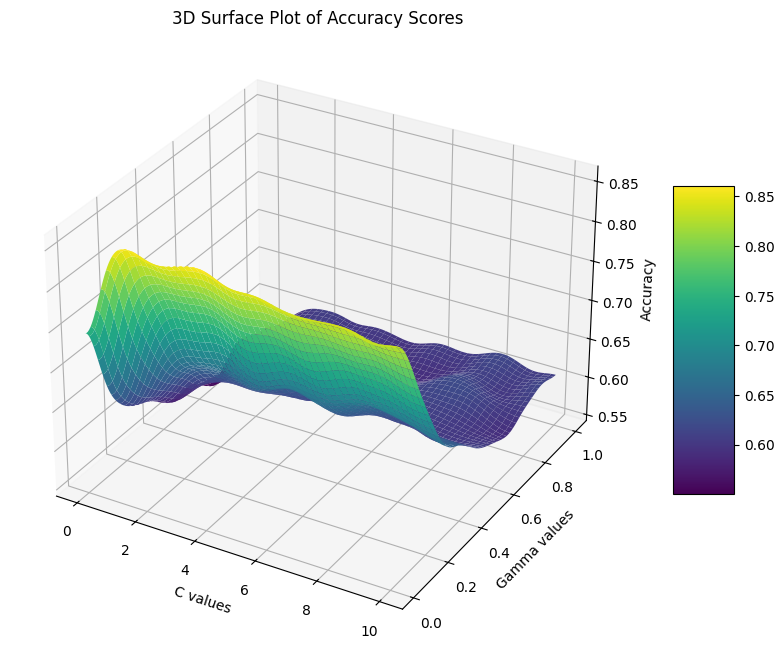

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cArr, gArr, and aArr are already defined
df = pd.DataFrame({'c': cArr, 'g': gArr, 'accuracy': aArr})

# Create a finer grid for C and gamma values
CVALUES_FINE = np.linspace(0.01, 10, 200)
GVALUES_FINE = np.linspace(0.01, 1, 200)
C_grid, G_grid = np.meshgrid(CVALUES_FINE, GVALUES_FINE)

# Interpolate accuracy scores over the finer grid
accuracy_grid = griddata((df['c'], df['g']), df['accuracy'], (C_grid, G_grid), method='cubic')

# Apply Gaussian filter to smooth the data
accuracy_grid_smooth = gaussian_filter(accuracy_grid, sigma=10)

# Plot the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(C_grid, G_grid, accuracy_grid_smooth, cmap='viridis')

ax.set_title('3D Surface Plot of Accuracy Scores')
ax.set_xlabel('C values')
ax.set_ylabel('Gamma values')
ax.set_zlabel('Accuracy')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

100%|██████████| 100/100 [01:12<00:00,  1.39it/s]


<Axes: xlabel='c', ylabel='g'>

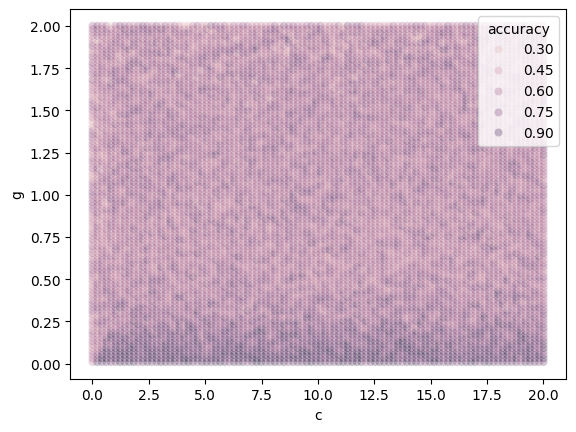

In [13]:
# from tqdm import tqdm
# import random

# CVALUES = np.linspace(0.01, 20, 100)
# GVALUES = np.linspace(0.01, 2, 100)

# cArr = []
# gArr = []
# aArr = []
# accuracy_scores = pd.DataFrame()

# for c in tqdm(CVALUES):
#     for g in GVALUES:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random.randint(1, 100))

#         model = SVC(kernel='rbf', C = c, gamma = g)
#         model.fit(X_train,y_train)

#         y_pred = model.predict(X_test)

#         cArr.append(c)
#         gArr.append(g)
#         aArr.append(accuracy_score(y_test, y_pred))

# df = pd.DataFrame({'c': cArr, 'g': gArr, 'accuracy': aArr})

# sns.scatterplot(data = df, x = 'c', y = 'g', hue = "accuracy", alpha = 0.3)


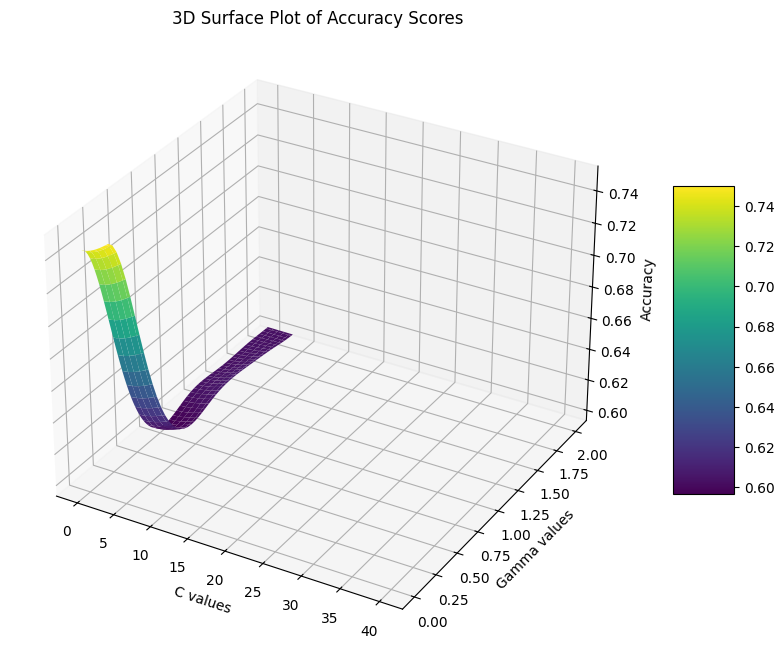

In [14]:
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.interpolate import griddata
# from scipy.ndimage import gaussian_filter
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming cArr, gArr, and aArr are already defined
# df = pd.DataFrame({'c': cArr, 'g': gArr, 'accuracy': aArr})

# # Create a finer grid for C and gamma values
# CVALUES_FINE = np.linspace(0.01, 40, 100)
# GVALUES_FINE = np.linspace(0.01, 2, 100)
# C_grid, G_grid = np.meshgrid(CVALUES_FINE, GVALUES_FINE)

# # Interpolate accuracy scores over the finer grid
# accuracy_grid = griddata((df['c'], df['g']), df['accuracy'], (C_grid, G_grid), method='cubic')

# # Apply Gaussian filter to smooth the data
# accuracy_grid_smooth = gaussian_filter(accuracy_grid, sigma=10)

# # Plot the 3D surface
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(C_grid, G_grid, accuracy_grid_smooth, cmap='viridis')

# ax.set_title('3D Surface Plot of Accuracy Scores')
# ax.set_xlabel('C values')
# ax.set_ylabel('Gamma values')
# ax.set_zlabel('Accuracy')

# fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
# plt.show()

In [15]:
# print(len(cArr))
# print(len(gArr))
# print(len(aArr))

10000
10000
10000


In [16]:
from sklearn.model_selection import GridSearchCV

svc_model = SVC()

param_grid = {'C':[0.01, 0.1, 1, 10], 'kernel':['linear', 'rbf'], 'gamma':['scale', 'auto']}

grid = GridSearchCV(svc_model, param_grid, cv=10)
grid.fit(X_train, y_train)

print('best score', grid.best_score_, 'best params', grid.best_params_)

best score 0.9607142857142857 best params {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

iris = pd.read_csv("data/iris.csv")

X = iris[["sepal_length", "sepal_width"]]
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = SVC(kernel='linear', C = 10000)
model.fit(scaled_X_train, y_train)

test_predictions = model.predict(scaled_X_test)
train_predictions = model.predict(scaled_X_train)

confusion_matrix(y_test, test_predictions)
print('Accuracy Score: ', round(accuracy_score(y_test, test_predictions), 3))
print(confusion_matrix(y_test, test_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_test, test_predictions))

# from svm_margin_plot import plot_svm_boundary
# plot_svm_boundary(model, scaled_X_test, y)

Accuracy Score:  0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
[[40  0  0]
 [ 0 31 10]
 [ 0 16 23]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


In [19]:
from sklearn.datasets import load_digits

digits = load_digits()

In [20]:
digits.images[45]
digits.target[45]
digits.data[45]

array([ 0.,  0.,  9., 16., 13.,  6.,  0.,  0.,  0.,  0.,  6.,  5., 16.,
       16.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,
        0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  4.,  8.,
       11., 15., 12.,  0.,  0.,  0., 11., 14., 12.,  8.,  0.,  0.])

np.int64(1)

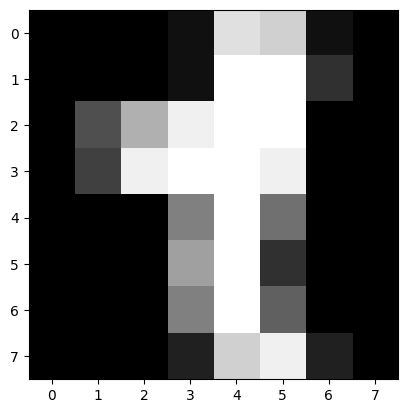

In [21]:
DigitNumber = 80
MyImage = digits.images[DigitNumber]
plt.imshow(MyImage, cmap = 'gray')
digits.target[DigitNumber]

In [22]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# rbf, sigmoid, linear, polynomial
model = SVC(kernel='rbf', C = 10, gamma = 'scale')
# model = SVC(kernel='rbf', C = 0.1, gamma = 'scale')
model.fit(scaled_X_train, y_train)

test_predictions = model.predict(scaled_X_test)
train_predictions = model.predict(scaled_X_train)

confusion_matrix(y_test, test_predictions)
print('Accuracy Score: ', round(accuracy_score(y_test, test_predictions), 3))
print(confusion_matrix(y_test, test_predictions))
# print(confusion_matrix(y_train, train_predictions))

print(classification_report(y_test, test_predictions))

Accuracy Score:  0.981
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  1]
 [ 0  0  1  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       

In [23]:
model = SVC()

param_grid = {'C':[0.01, 0.1, 1, 10], 'kernel':['linear', 'rbf'], 'gamma':['scale', 'auto']}

grid = GridSearchCV(model, param_grid, cv=10)
grid.fit(X_train, y_train)

print('best score', grid.best_score_, 'best params', grid.best_params_)

best score 0.9923513986013986 best params {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [25]:
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.interpolate import griddata
# from scipy.ndimage import gaussian_filter
# from tqdm import tqdm
# import random

# CVALUES = np.linspace(0.01, 10, 50)
# GVALUES = np.linspace(0.01, 1, 50)

# cArr = []
# gArr = []
# aArr = []

# for c in tqdm(CVALUES):
#     for g in GVALUES:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random.randint(1, 100))

#         scaler = StandardScaler()
#         scaled_X_train = scaler.fit_transform(X_train)
#         scaled_X_test = scaler.transform(X_test)

#         model = SVC(kernel='rbf', C = 10000)
#         model.fit(scaled_X_train, y_train)

#         y_pred = model.predict(X_test)

#         cArr.append(c)
#         gArr.append(g)
#         aArr.append(accuracy_score(y_test, y_pred))



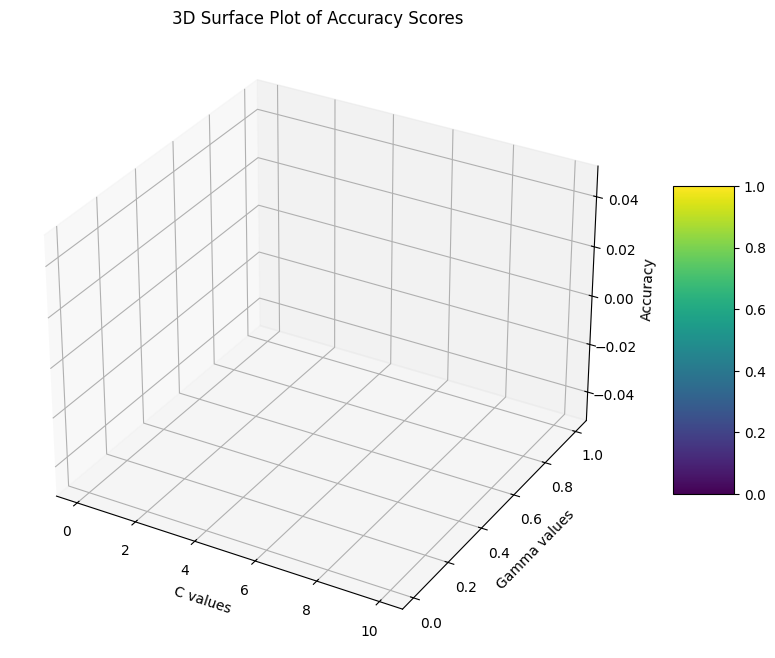

In [26]:
# Assuming cArr, gArr, and aArr are already defined
df = pd.DataFrame({'c': cArr, 'g': gArr, 'accuracy': aArr})

# Create a finer grid for C and gamma values
CVALUES_FINE = np.linspace(0.01, 10, 200)
GVALUES_FINE = np.linspace(0.01, 1, 200)
C_grid, G_grid = np.meshgrid(CVALUES_FINE, GVALUES_FINE)

# Interpolate accuracy scores over the finer grid
accuracy_grid = griddata((df['c'], df['g']), df['accuracy'], (C_grid, G_grid), method='cubic')

# Apply Gaussian filter to smooth the data
accuracy_grid_smooth = gaussian_filter(accuracy_grid, sigma=20)

# Plot the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(C_grid, G_grid, accuracy_grid_smooth, cmap='viridis')

ax.set_title('3D Surface Plot of Accuracy Scores')
ax.set_xlabel('C values')
ax.set_ylabel('Gamma values')
ax.set_zlabel('Accuracy')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [27]:
gene = pd.read_csv("data/gene_expression.csv")

gene

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [28]:

X = gene[["Gene One", "Gene Two"]]
y = gene["Cancer Present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# rbf, sigmoid, linear, polynomial
model = SVC(kernel='rbf', C = 10, gamma = 'scale') # 93.5%
# model = SVC(kernel='rbf', C = 0.1, gamma = 'auto')
# 'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'
model.fit(X_train, y_train)

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

confusion_matrix(y_test, test_predictions)
print('Accuracy Score: ', round(accuracy_score(y_test, test_predictions), 3))
print(confusion_matrix(y_test, test_predictions))
# print(confusion_matrix(y_train, train_predictions))

print(classification_report(y_test, test_predictions))

Accuracy Score:  0.935
[[309  19]
 [ 20 252]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       328
           1       0.93      0.93      0.93       272

    accuracy                           0.94       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.94      0.93       600


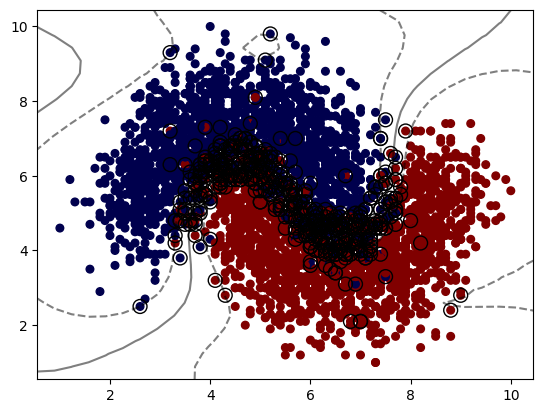

In [29]:
from svm_margin_plot import plot_svm_boundary

# model = SVC(kernel='rbf', C = 10, gamma = 0.5)
model = SVC(kernel='rbf', C = 10, gamma = 'scale') # 93.5%
model.fit(X,y)
plot_svm_boundary(model, X, y)

In [30]:
model = SVC()

param_grid = {'C':[0.01, 0.1, 1, 10], 'kernel':['linear', 'rbf'], 'gamma':['scale', 'auto']}

grid = GridSearchCV(model, param_grid, cv=10)
grid.fit(X_train, y_train)

print('best score', grid.best_score_, 'best params', grid.best_params_)

best score 0.9324999999999999 best params {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [32]:
# model = SVC()

# param_grid = {'C':np.linspace(0, 10), 'kernel':['linear', 'rbf'], 'gamma':['scale', 'auto']}

# grid = GridSearchCV(model, param_grid, cv=10)
# grid.fit(X_train, y_train)

# print('best score', grid.best_score_, 'best params', grid.best_params_)

 # Decision Trees

In [34]:
import warnings

warnings.filterwarnings("ignore")

iris = pd.read_csv("data/iris.csv")

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = iris.drop("species", axis = 1)
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

y_pred = model.predict(X_test)

# confusion_matrix(y_test, y_pred)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

Accuracy Score:  1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


## Snowmen categorical Decision Tree

In [38]:
data = pd.read_csv("data/Snowmen.csv")

In [40]:
data.columns

Index(['Location', 'head', 'middle', 'base', 'initial height', 'later height'], dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 

X = data.drop("Location", axis = 1)
y = data["Location"]

train = []
test = []

for depth in tqdm(range(1,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    y_pred_test = model.predict(X_test)
    train.append(accuracy_score(y_train, y_pred_train))
    test.append(accuracy_score(y_test, y_pred_test))

# confusion_matrix(y_test, y_pred)
# print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
# print(classification_report(y_test, y_pred))

100%|██████████| 19/19 [00:00<00:00, 96.37it/s]


C:\Users\coleo\AppData\Local\Temp\ipykernel_25468\3603397935.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


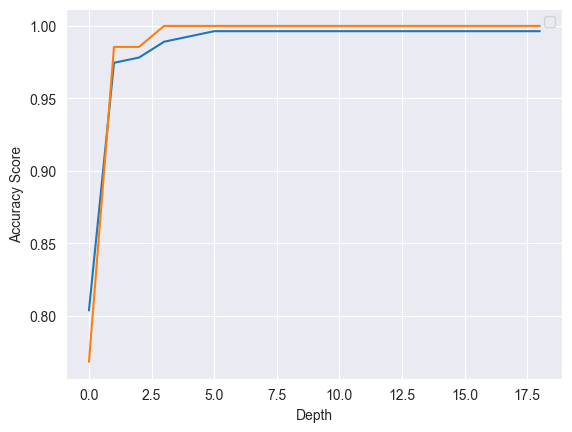

In [12]:
plt.plot(train)
plt.plot(test)
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [62]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
param_grid = {'max_depth':range(1,8)}

grid = GridSearchCV(model, param_grid, cv = 10)
grid.fit(X_train, y_train)

print('best score', grid.best_score_, 'best params', grid.best_params_)



best score 0.6599999999999999 best params {'max_depth': 3}


In [63]:
data.columns

Index(['Location', 'head', 'middle', 'base', 'initial height', 'later height'], dtype='object')

100%|██████████| 19/19 [00:00<00:00, 66.57it/s]


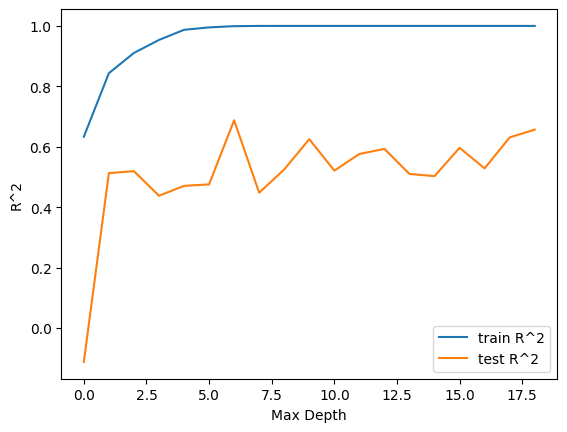

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm


def dummify(df):
    
    df_objects = df.select_dtypes(include = "object")
    df_numeric = df.select_dtypes(exclude = "object")

    df_dummies = pd.get_dummies(df_objects, drop_first = True)

    df = pd.concat([df_numeric, df_dummies], axis = 1)
    return df

data_dummy = dummify(data)

X = data_dummy.drop("head", axis = 1)
y = data_dummy["head"]
train = []
test = []
trainr2 = []
testr2 = []

for depth in tqdm(range(1,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
#     print('intercept=', model.intercept_)
#     print(pd.DataFrame(model.coef_, columns=['Coefficient']))
    MAE = mean_absolute_error(y_test, test_predictions)
    MSE = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    RMSE = np.sqrt(MSE)
#     print('Testing: MAE=', MAE, ', MSE=', MSE, ', RMSE=', RMSE, 'R^2', r2)
    MAE_train = mean_absolute_error(y_train, train_predictions)
    MSE_train = mean_squared_error(y_train, train_predictions)
    r2_train = r2_score(y_train, train_predictions)
    RMSE_train = np.sqrt(MSE_train)
    train.append(RMSE_train)
    test.append(RMSE)
    trainr2.append(r2_train)
    testr2.append(r2)
    
    
# plt.plot(train, label='train')
# plt.plot(test, label='test')
# plt.xlabel("Max Depth")
# plt.ylabel("RMSE")
# plt.legend()


plt.plot(trainr2, label='train R^2')
plt.plot(testr2, label='test R^2')
plt.xlabel("Max Depth")
plt.ylabel("R^2")
plt.legend()
# confusion_matrix(y_test, y_pred)
# print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 3))
# print(classification_report(y_test, y_pred))

In [74]:
from sklearn.tree import plot_tree

plot_tree(model, filled = True, feature_names = X.columns.tolist(), class_names = classNames, fontsize = 1)

NameError: name 'classNames' is not defined

# Random Forests

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


df3 = pd.read_csv("data/penguins_no_dummies.csv")
df3 = df3.drop('Unnamed: 0', axis = 1)
X = pd.get_dummies(df3.drop('species', axis = 1), drop_first = True)
y = df3['species']


In [29]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 


train = []
test = []

for depth in tqdm(range(1,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = RandomForestClassifier(max_depth = depth, n_estimators = 5, random_state = 42, max_features = 3)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    y_pred_test = model.predict(X_test)
    train.append(accuracy_score(y_train, y_pred_train))
    test.append(accuracy_score(y_test, y_pred_test))


100%|██████████| 19/19 [00:00<00:00, 46.53it/s]


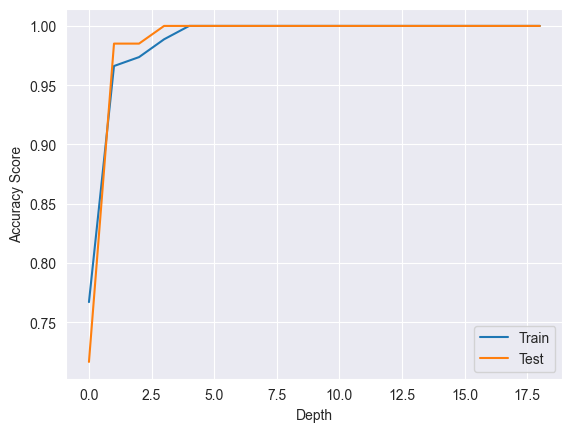

In [30]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [31]:
confusion_matrix(y_test, y_pred_test)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_test), 3))
print(classification_report(y_test, y_pred_test))

Accuracy Score:  1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


In [32]:
pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
island_Torgersen,0.004639
sex_MALE,0.006279
body_mass_g,0.037091
island_Dream,0.076246
flipper_length_mm,0.235928
culmen_length_mm,0.299261
culmen_depth_mm,0.340555


In [39]:
df3['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

[Text(0.5882352941176471, 0.9545454545454546, 'culmen_depth_mm <= 16.5\ngini = 0.629\nsamples = 163\nvalue = [115, 47, 104]\nclass = Adelie'),
 Text(0.47058823529411764, 0.8636363636363636, 'culmen_length_mm <= 39.3\ngini = 0.092\nsamples = 58\nvalue = [5, 0, 98]\nclass = Chinstrap'),
 Text(0.5294117647058824, 0.9090909090909092, 'True  '),
 Text(0.4117647058823529, 0.7727272727272727, 'gini = 0.0\nsamples = 3\nvalue = [5, 0, 0]\nclass = Adelie'),
 Text(0.5294117647058824, 0.7727272727272727, 'gini = 0.0\nsamples = 55\nvalue = [0, 0, 98]\nclass = Chinstrap'),
 Text(0.7058823529411765, 0.8636363636363636, 'body_mass_g <= 5025.0\ngini = 0.46\nsamples = 105\nvalue = [110, 47, 6]\nclass = Adelie'),
 Text(0.6470588235294118, 0.9090909090909092, '  False'),
 Text(0.6470588235294118, 0.7727272727272727, 'island_Dream <= 0.5\ngini = 0.419\nsamples = 101\nvalue = [110, 47, 0]\nclass = Adelie'),
 Text(0.5882352941176471, 0.6818181818181818, 'gini = 0.0\nsamples = 43\nvalue = [71, 0, 0]\nclass = 

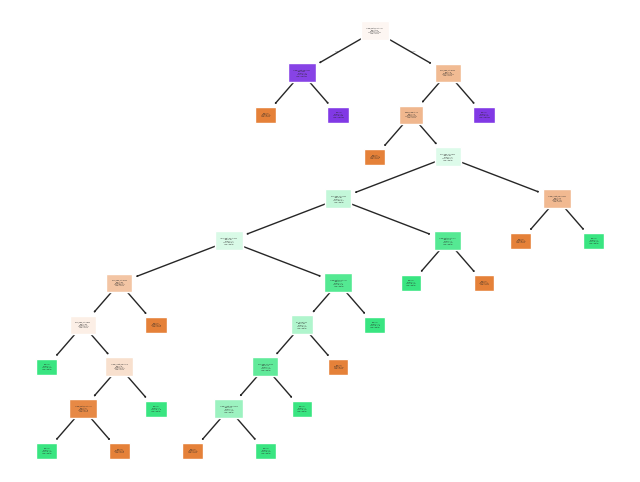

In [40]:
from sklearn.tree import plot_tree
classNames = ['Adelie', 'Gentoo', 'Chinstrap']
plt.figure(figsize = [8,6])
plot_tree(model[3], filled = True, feature_names = X.columns.tolist(), class_names = classNames, fontsize = 1)

In [41]:
hotel = pd.read_csv("data/Hotels8000_cleaned.csv")

In [44]:
hotel.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies',
       ...
       'AssignedRoomType_D               ',
       'AssignedRoomType_E               ',
       'AssignedRoomType_F               ',
       'AssignedRoomType_G               ',
       'AssignedRoomType_H               ',
       'AssignedRoomType_I               ',
       'AssignedRoomType_K               ', 'CustomerType_Group',
       'CustomerType_Transient', 'CustomerType_Transient-Party'],
      dtype='object', length=169)

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


df3 = hotel
X = pd.get_dummies(df3.drop('IsCanceled', axis = 1), drop_first = True)
y = df3['IsCanceled']


In [62]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 


train = []
test = []
depth = []
features = []
estimators = []
for dep in tqdm(range(1,20, 4)):
    for feature in range(1,10, 3):
        for estim in range(1,20, 4):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

            model = RandomForestClassifier(max_depth = dep, n_estimators = estim, 
                                           random_state = 42, max_features = feature)
            model.fit(X_train, y_train)

            y_pred_train = model.predict(X_train)

            y_pred_test = model.predict(X_test)
            train.append(accuracy_score(y_train, y_pred_train))
            test.append(accuracy_score(y_test, y_pred_test))
            depth.append(dep)
            features.append(feature)
            estimators.append(estim)


100%|██████████| 19/19 [04:00<00:00, 12.65s/it]


Best Test Accuracy: 0.843125 
Best Train Accuracy: 0.94359375 
Best Max_Depth: 18 
Best Max_Features: 9 
Best N_estimators: 18 


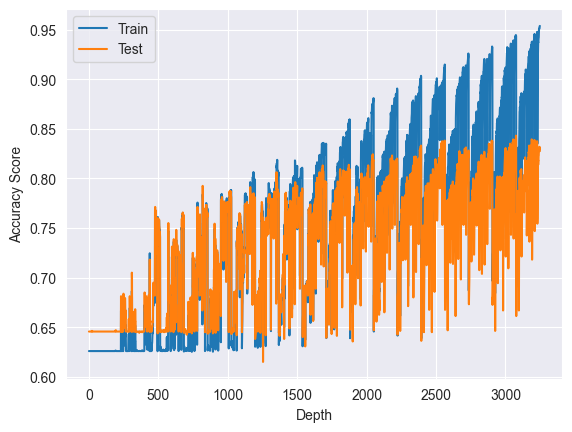

In [63]:
best_one = max(enumerate(test),key=lambda x: x[1])[0]
print(f"Best Test Accuracy: {test[best_one]} ")
print(f"Best Train Accuracy: {train[best_one]} ")

print(f"Best Max_Depth: {depth[best_one]} ")
print(f"Best Max_Features: {features[best_one]} ")

print(f"Best N_estimators: {estimators[best_one]} ")
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [54]:
importance = pd.DataFrame(index = X.columns, data = model.feature_importances_, 
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)
importance[importance['Feature Importance'] > 0.01]

,Feature Importance
Country_PRT,0.151829
LeadTime,0.068759
TotalOfSpecialRequests,0.056293
ADR,0.040319
RequiredCarParkingSpaces,0.039657
CustomerType_Transient-Party,0.037262
MarketSegment_Groups,0.036909
PreviousCancellations,0.036415
TotalPrice,0.035575
ArrivalDateDayOfMonth,0.034540


In [66]:

df3 = hotel
X = pd.get_dummies(df3.drop(['ADR', 'TotalPrice'], axis = 1), drop_first = True)
y = df3['TotalPrice']
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm 
    
train = []
test = []
trainr2 = []
testr2 = []
depth = []
features = []
estimators = []
for dep in tqdm(range(1,20, 4)):
    for feature in range(1,10, 3):
        for estim in range(1,20, 4):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

            model = RandomForestRegressor(max_depth = dep, n_estimators = estim, 
                                           random_state = 42, max_features = feature)
            model.fit(X_train, y_train)
            test_predictions = model.predict(X_test)
            train_predictions = model.predict(X_train)
        #     print('intercept=', model.intercept_)
        #     print(pd.DataFrame(model.coef_, columns=['Coefficient']))
            MAE = mean_absolute_error(y_test, test_predictions)
            MSE = mean_squared_error(y_test, test_predictions)
            r2 = r2_score(y_test, test_predictions)
            RMSE = np.sqrt(MSE)
        #     print('Testing: MAE=', MAE, ', MSE=', MSE, ', RMSE=', RMSE, 'R^2', r2)
            MAE_train = mean_absolute_error(y_train, train_predictions)
            MSE_train = mean_squared_error(y_train, train_predictions)
            r2_train = r2_score(y_train, train_predictions)
            RMSE_train = np.sqrt(MSE_train)
            train.append(RMSE_train)
            test.append(RMSE)
            trainr2.append(r2_train)
            testr2.append(r2)
            depth.append(dep)
            features.append(feature)
            estimators.append(estim)
    
    
# plt.plot(train, label='train')
# plt.plot(test, label='test')
# plt.xlabel("Max Depth")
# plt.ylabel("RMSE")
# plt.legend()



100%|██████████| 5/5 [00:05<00:00,  1.04s/it]


Best Test RMSE Accuracy: 357.50075714090326 
Best Train RMSE Accuracy: 318.06438488662775 
Best Test R^2 Accuracy: 0.008099768304746013 
Best Train R^2 Accuracy: 0.010383109418023562 
Best Max_Depth: 1 
Best Max_Features: 1 
Best N_estimators: 17 


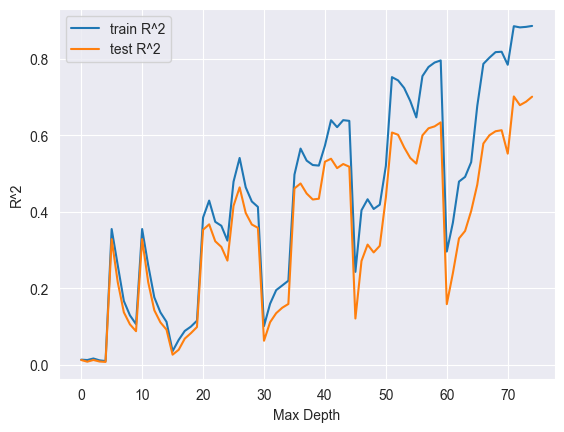

In [68]:
best_one = max(enumerate(test),key=lambda x: x[1])[0]
print(f"Best Test RMSE Accuracy: {test[best_one]} ")
print(f"Best Train RMSE Accuracy: {train[best_one]} ")
print(f"Best Test R^2 Accuracy: {testr2[best_one]} ")
print(f"Best Train R^2 Accuracy: {trainr2[best_one]} ")
print(f"Best Max_Depth: {depth[best_one]} ")
print(f"Best Max_Features: {features[best_one]} ")

print(f"Best N_estimators: {estimators[best_one]} ")

plt.plot(trainr2, label='train R^2')
plt.plot(testr2, label='test R^2')
plt.xlabel("Max Depth")
plt.ylabel("R^2")
plt.legend()